In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
#Carrega o dataset limpo
df = pd.read_csv("data/processed/dataset_clean.csv")
print("Dataset carregado:", df.shape)

Dataset carregado: (282, 19)


In [3]:
#Estatísticas descritivas
display(df.describe())

# Verifica presença de nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

,Localidade_id,year,week,casos,Rt,pop,tempmed,umidmed,t_mean,precip_sum,municipio_id,pop_density,casos_lag1,casos_lag2,casos_lag3,casos_lag4,casos_roll4
count,282.0,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.0,282.0,282.000000,282.000000,282.000000,282.000000,282.000000
mean,0.0,2020.460993,26.496454,0.022416,0.455575,0.843972,0.527085,0.647902,0.555669,0.354454,0.0,0.0,0.022351,0.022284,0.022201,0.022120,0.023397
std,0.0,1.708333,14.935269,0.027968,0.132589,0.363527,0.172767,0.170419,0.217599,0.229199,0.0,0.0,0.027970,0.027983,0.027993,0.028002,0.029368
min,0.0,2018.000000,1.000000,0.000000,0.063237,0.000000,0.000000,0.055383,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000467
25%,0.0,2019.000000,14.000000,0.005088,0.355961,1.000000,0.403462,0.550327,0.390863,0.184584,0.0,0.0,0.005088,0.005088,0.005088,0.005088,0.005095
50%,0.0,2020.000000,26.500000,0.010904,0.442401,1.000000,0.540695,0.664257,0.565040,0.316349,0.0,0.0,0.010904,0.010565,0.010412,0.010362,0.011582
75%,0.0,2022.000000,39.750000,0.026294,0.538075,1.000000,0.650029,0.774870,0.726485,0.522679,0.0,0.0,0.025963,0.025454,0.025276,0.024971,0.026680
max,0.0,2023.000000,52.000000,0.133666,0.911002,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.133666,0.133666,0.133666,0.133666,0.138140


Valores nulos por coluna:
Localidade_id    0
year             0
week             0
casos            0
Rt               0
pop              0
tempmed          0
umidmed          0
datahora         0
station          0
t_mean           0
precip_sum       0
municipio_id     0
pop_density      0
casos_lag1       0
casos_lag2       0
casos_lag3       0
casos_lag4       0
casos_roll4      0
dtype: int64


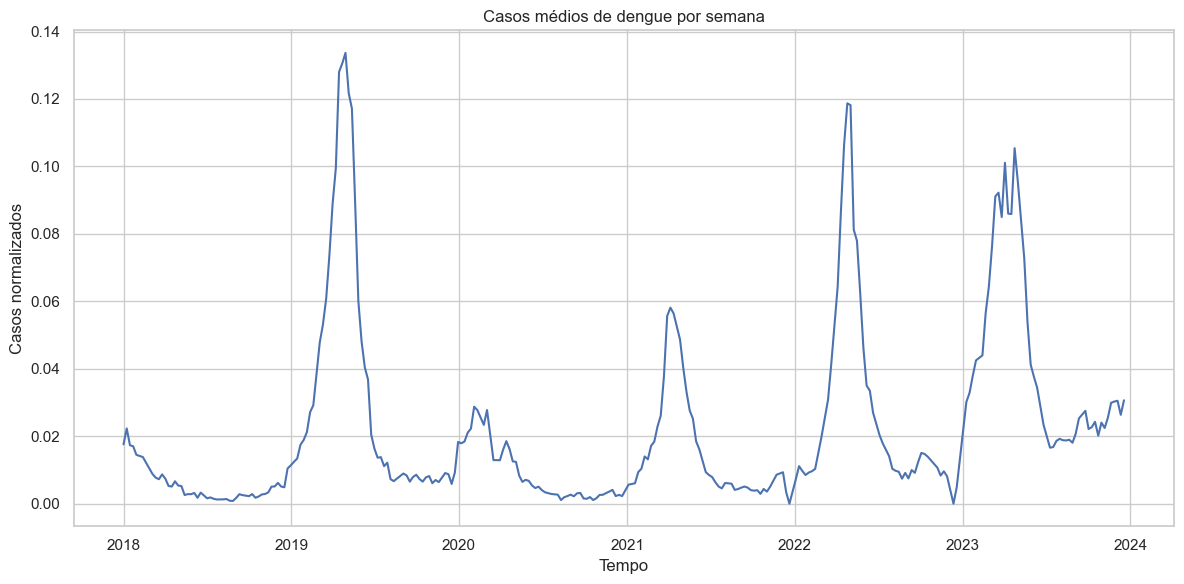

In [5]:
#Série temporal de casos (média por semana)
df_grouped = df.groupby(["year", "week"], as_index=False)["casos"].mean()
from datetime import datetime
df_grouped["data"] = df_grouped.apply(
    lambda row: datetime.fromisocalendar(int(row["year"]), int(row["week"]), 1),
    axis=1
)

plt.plot(df_grouped["data"], df_grouped["casos"])
plt.title("Casos médios de dengue por semana")
plt.xlabel("Tempo")
plt.ylabel("Casos normalizados")
plt.tight_layout()
plt.show()

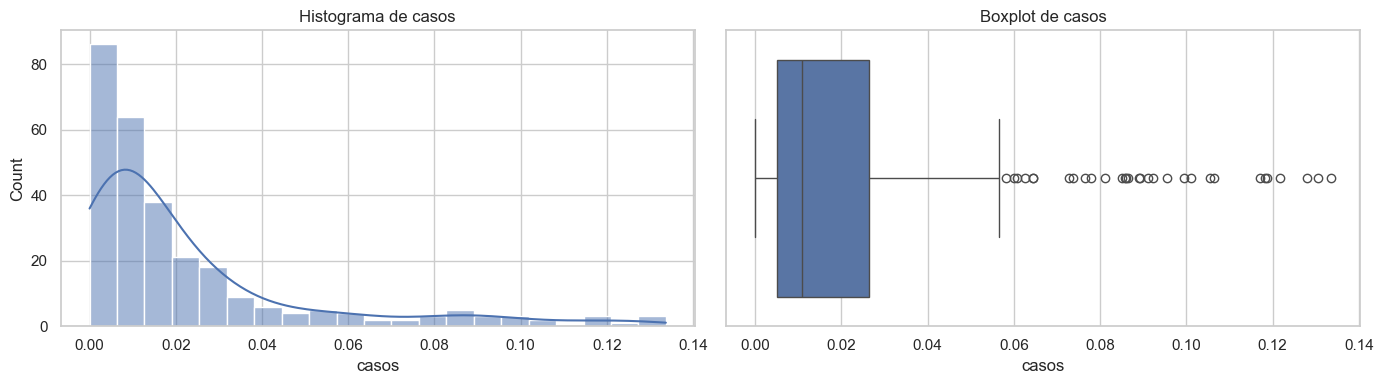

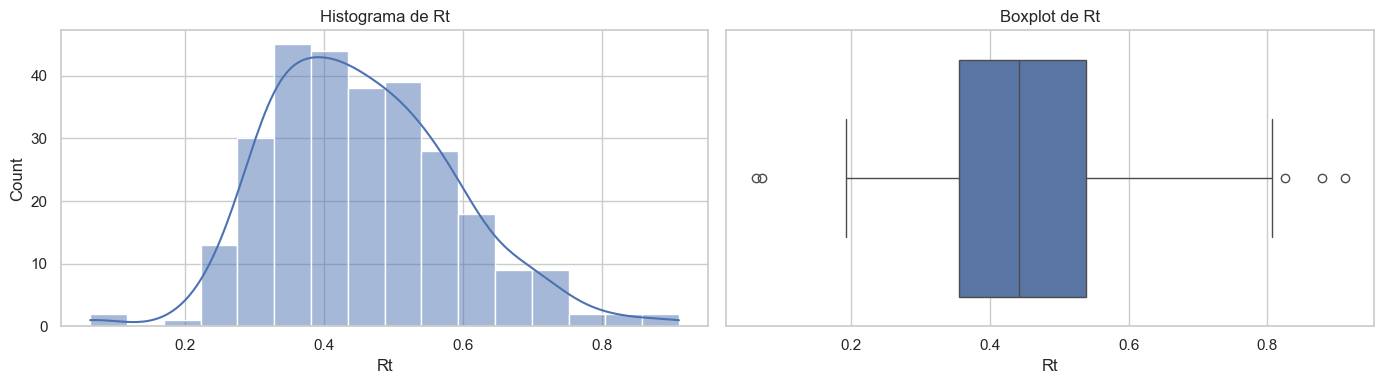

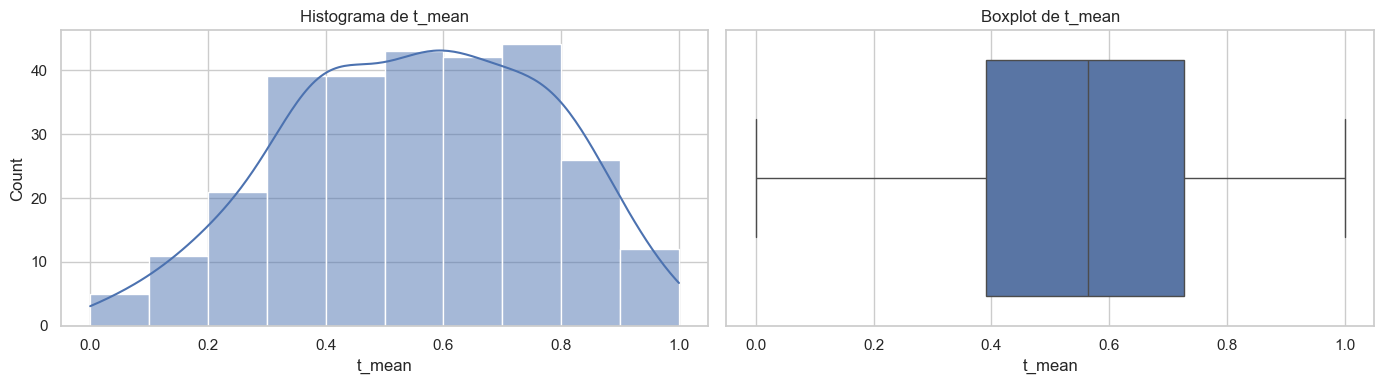

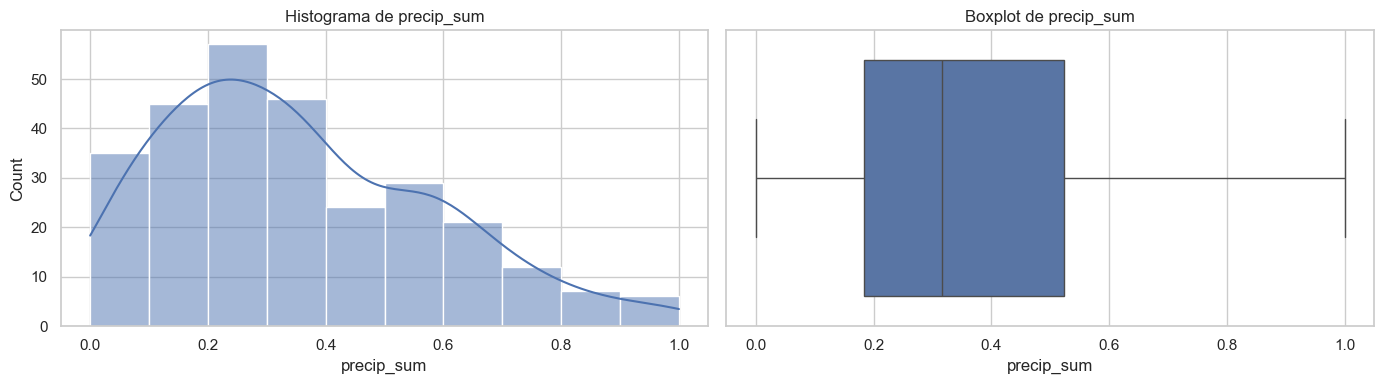

In [6]:
#Histogramas e boxplots
for col in ["casos", "Rt", "t_mean", "precip_sum"]:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

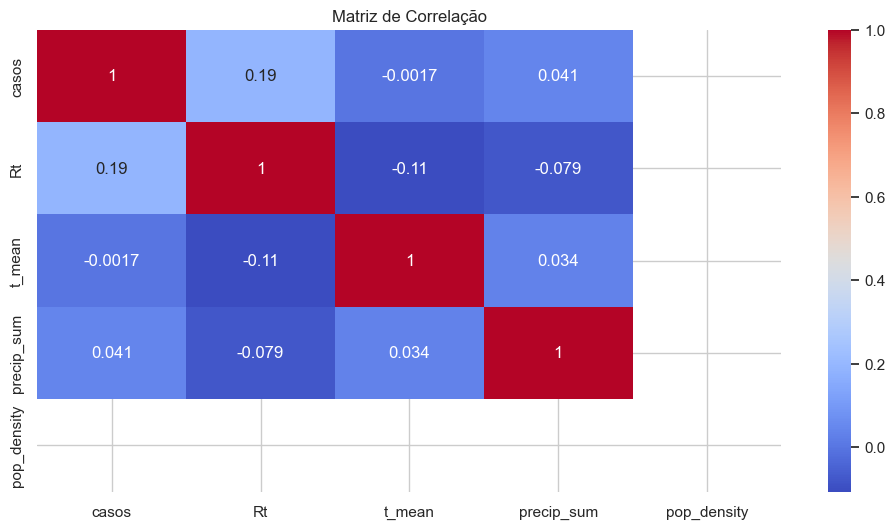

In [7]:
#Correlação entre variáveis
corr = df[["casos", "Rt", "t_mean", "precip_sum", "pop_density"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

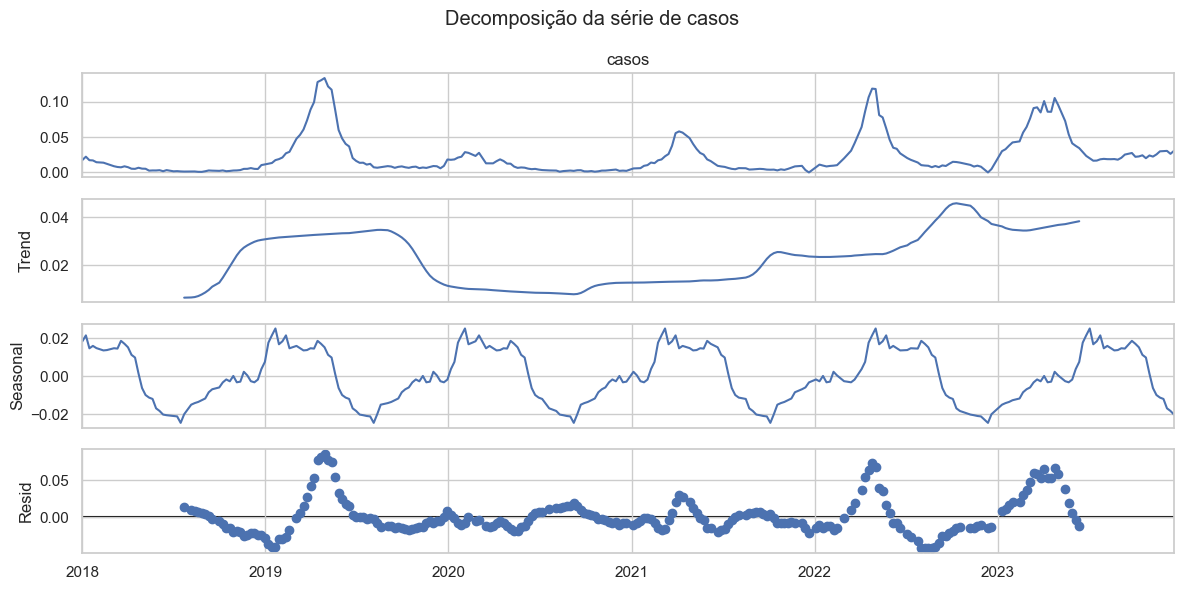

In [8]:
#Decomposição temporal (casos médios)
df_decomp = df_grouped.set_index("data")
result = seasonal_decompose(df_decomp["casos"], model="additive", period=52)

result.plot()
plt.suptitle("Decomposição da série de casos")
plt.tight_layout()
plt.show()

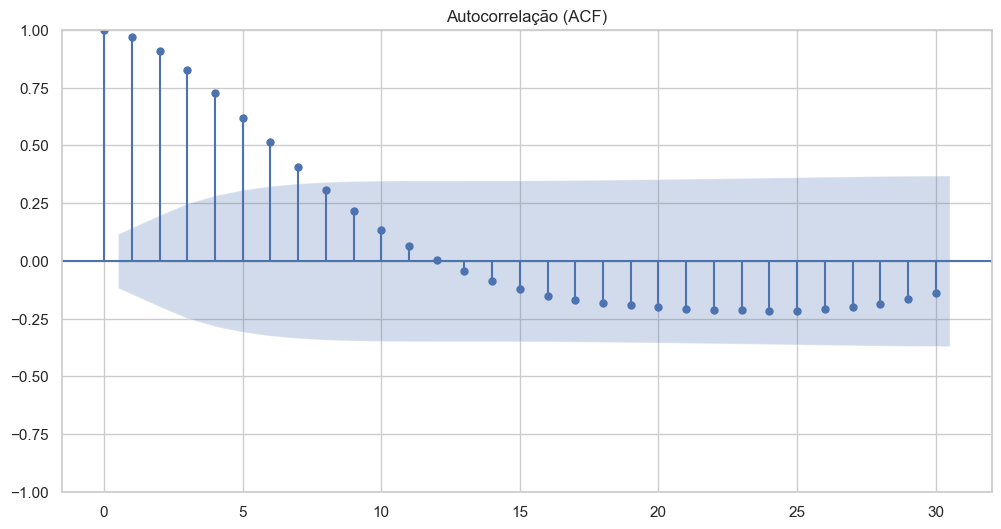

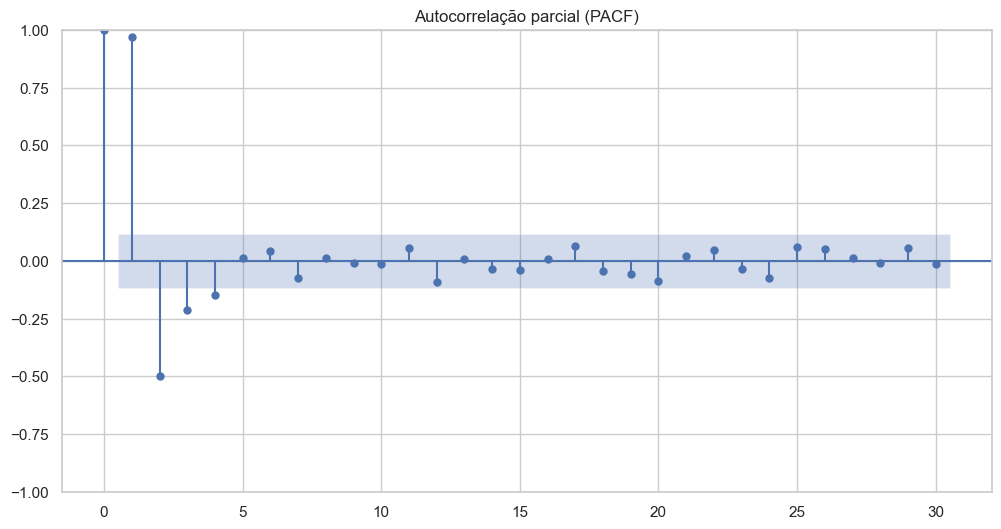

In [9]:
#ACF e PACF
plot_acf(df_decomp["casos"], lags=30)
plt.title("Autocorrelação (ACF)")
plt.show()

plot_pacf(df_decomp["casos"], lags=30)
plt.title("Autocorrelação parcial (PACF)")
plt.show()

In [10]:
#Saídas geradas
# Gráficos de séries temporais
# Histogramas e boxplots
# Heatmap de correlação
# Decomposição temporal
# ACF e PACF
